In [1]:
import numpy as np
import pandas as pd
arrays = [['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]
tuples = list(zip(*arrays))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [2]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])

In [3]:
s = pd.Series(np.random.randn(8), index=index)
s

first  second
bar    one       1.020877
       two       0.057915
baz    one       0.034000
       two      -1.361393
foo    one      -0.829724
       two       0.551579
qux    one       0.524939
       two       0.203630
dtype: float64

In [11]:
index.get_level_values('second')

Index(['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two'], dtype='object', name='second')

In [78]:
s.loc['bar']

second
one    1.020877
two    0.057915
dtype: float64

In [38]:
s.index.values

array([('bar', 'one'), ('bar', 'two'), ('baz', 'one'), ('baz', 'two'),
       ('foo', 'one'), ('foo', 'two'), ('qux', 'one'), ('qux', 'two')],
      dtype=object)

In [9]:
df = pd.DataFrame(np.random.randn(3, 8), index=['A', 'B', 'C'], columns=index)
df

first        bar                 baz                 foo                 qux  \
second       one       two       one       two       one       two       one   
A       1.566155  1.085534 -0.781157  2.216682  0.139153 -1.422679 -0.110773   
B       0.655252 -1.258677  0.935682 -0.020424 -0.964927 -1.670416  1.026407   
C      -0.006110  1.462841 -0.810243  1.296750  1.651759 -0.188926  2.353429   

first             
second       two  
A       0.948455  
B       1.863825  
C      -0.143122

In [19]:
df['bar']['one']

A    1.566155
B    0.655252
C   -0.006110
Name: one, dtype: float64

In [37]:
df.index.values

array(['A', 'B', 'C'], dtype=object)

In [21]:
df.columns

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])

In [22]:
df.columns.get_level_values(0)

Index(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'], dtype='object', name='first')

In [41]:
s.reindex([('foo', 'two'), ('bar', 'one'), ('qux', 'one'), ('baz', 'one'),('foo', 'two'), ('bar2', 'one2'), ('qux2', 'one2'), ('baz2', 'one2')])

first  second
foo    two       0.551579
bar    one       1.020877
qux    one       0.524939
baz    one       0.034000
foo    two       0.551579
bar2   one2           NaN
qux2   one2           NaN
baz2   one2           NaN
dtype: float64

In [71]:
df

first        bar                 baz                 foo                 qux  \
second       one       two       one       two       one       two       one   
A       1.566155  1.085534 -0.781157  2.216682  0.139153 -1.422679 -0.110773   
B       0.655252 -1.258677  0.935682 -0.020424 -0.964927 -1.670416  1.026407   
C      -0.006110  1.462841 -0.810243  1.296750  1.651759 -0.188926  2.353429   

first             
second       two  
A       0.948455  
B       1.863825  
C      -0.143122

In [44]:
df.T

A         B         C
first second                              
bar   one     1.566155  0.655252 -0.006110
      two     1.085534 -1.258677  1.462841
baz   one    -0.781157  0.935682 -0.810243
      two     2.216682 -0.020424  1.296750
foo   one     0.139153 -0.964927  1.651759
      two    -1.422679 -1.670416 -0.188926
qux   one    -0.110773  1.026407  2.353429
      two     0.948455  1.863825 -0.143122

In [121]:
df['bar','one']['A']

1.5661545295816275

In [99]:
s1 = pd.Series(np.random.randn(3),index=['A','B','C'])
s1

A   -1.104184
B   -0.473799
C   -2.712450
dtype: float64

In [115]:
df['A':'B']

first        bar                 baz                 foo                 qux  \
second       one       two       one       two       one       two       one   
A       1.566155  1.085534 -0.781157  2.216682  0.139153 -1.422679 -0.110773   
B       0.655252 -1.258677  0.935682 -0.020424 -0.964927 -1.670416  1.026407   

first             
second       two  
A       0.948455  
B       1.863825

In [105]:
s1['A':'B']

A   -1.104184
B   -0.473799
dtype: float64

In [116]:
s = pd.Series([1, 2, 3, 4, 5, 6],index=pd.MultiIndex.from_product([["A", "B"], ["c", "d", "e"]]))
s

A  c    1
   d    2
   e    3
B  c    4
   d    5
   e    6
dtype: int64

In [117]:
s.T

A  c    1
   d    2
   e    3
B  c    4
   d    5
   e    6
dtype: int64

In [132]:
def mklbl(prefix,n):
    return ["%s%s" % (prefix,i)  for i in range(n)]
miindex = pd.MultiIndex.from_product([mklbl('A',4),mklbl('B',2),mklbl('C',4),mklbl('D',2)])
micolumns = pd.MultiIndex.from_tuples([('a','foo'),('a','bar'),('b','foo'),('b','bah')],names=['lvl0', 'lvl1'])

In [133]:
dfmi = pd.DataFrame(np.arange(len(miindex)*len(micolumns)).reshape((len(miindex),len(micolumns))),index=miindex,columns=micolumns).sort_index().sort_index(axis=1)
dfmi

lvl0           a         b     
lvl1         bar  foo  bah  foo
A0 B0 C0 D0    1    0    3    2
         D1    5    4    7    6
      C1 D0    9    8   11   10
         D1   13   12   15   14
      C2 D0   17   16   19   18
         D1   21   20   23   22
      C3 D0   25   24   27   26
         D1   29   28   31   30
   B1 C0 D0   33   32   35   34
         D1   37   36   39   38
      C1 D0   41   40   43   42
         D1   45   44   47   46
      C2 D0   49   48   51   50
         D1   53   52   55   54
      C3 D0   57   56   59   58
         D1   61   60   63   62
A1 B0 C0 D0   65   64   67   66
         D1   69   68   71   70
      C1 D0   73   72   75   74
         D1   77   76   79   78
      C2 D0   81   80   83   82
         D1   85   84   87   86
      C3 D0   89   88   91   90
         D1   93   92   95   94
   B1 C0 D0   97   96   99   98
         D1  101  100  103  102
      C1 D0  105  104  107  106
         D1  109  108  111  110
      C2 D0  113  112  115  114
         D1  117  116  119  118
...          ...  ...  ...  ...
A2 B0 C1 D0  137  136  139  138
         D1  141  140  143  142
      C2 D0  145  144  147  146
         D1  149  148  151  150
      C3 D0  153  152  155  154
         D1  157  156  159  158
   B1 C0 D0  161  160  163  162
         D1  165  164  167  166
      C1 D0  169  168  171  170
         D1  173  172  175  174
      C2 D0  177  176  179  178
         D1  181  180  183  182
      C3 D0  185  184  187  186
         D1  189  188  191  190
A3 B0 C0 D0  193  192  195  194
         D1  197  196  199  198
      C1 D0  201  200  203  202
         D1  205  204  207  206
      C2 D0  209  208  211  210
         D1  213  212  215  214
      C3 D0  217  216  219  218
         D1  221  220  223  222
   B1 C0 D0  225  224  227  226
         D1  229  228  231  230
      C1 D0  233  232  235  234
         D1  237  236  239  238
      C2 D0  241  240  243  242
         D1  245  244  247  246
      C3 D0  249  248  251  250
         D1  253  252  255  254

[64 rows x 4 columns]

In [147]:
dfmi.loc[('A0','B0','C0')]


lvl0   a       b    
lvl1 bar foo bah foo
D0     1   0   3   2
D1     5   4   7   6

In [159]:
dfmi[('A0','B0'):('A1','B0','C0')]

lvl0          a       b    
lvl1        bar foo bah foo
A0 B0 C0 D0   1   0   3   2
         D1   5   4   7   6
      C1 D0   9   8  11  10
         D1  13  12  15  14
      C2 D0  17  16  19  18
         D1  21  20  23  22
      C3 D0  25  24  27  26
         D1  29  28  31  30
   B1 C0 D0  33  32  35  34
         D1  37  36  39  38
      C1 D0  41  40  43  42
         D1  45  44  47  46
      C2 D0  49  48  51  50
         D1  53  52  55  54
      C3 D0  57  56  59  58
         D1  61  60  63  62
A1 B0 C0 D0  65  64  67  66
         D1  69  68  71  70

In [163]:
dfmi['a']

lvl1         bar  foo
A0 B0 C0 D0    1    0
         D1    5    4
      C1 D0    9    8
         D1   13   12
      C2 D0   17   16
         D1   21   20
      C3 D0   25   24
         D1   29   28
   B1 C0 D0   33   32
         D1   37   36
      C1 D0   41   40
         D1   45   44
      C2 D0   49   48
         D1   53   52
      C3 D0   57   56
         D1   61   60
A1 B0 C0 D0   65   64
         D1   69   68
      C1 D0   73   72
         D1   77   76
      C2 D0   81   80
         D1   85   84
      C3 D0   89   88
         D1   93   92
   B1 C0 D0   97   96
         D1  101  100
      C1 D0  105  104
         D1  109  108
      C2 D0  113  112
         D1  117  116
...          ...  ...
A2 B0 C1 D0  137  136
         D1  141  140
      C2 D0  145  144
         D1  149  148
      C3 D0  153  152
         D1  157  156
   B1 C0 D0  161  160
         D1  165  164
      C1 D0  169  168
         D1  173  172
      C2 D0  177  176
         D1  181  180
      C3 D0  185  184
         D1  189  188
A3 B0 C0 D0  193  192
         D1  197  196
      C1 D0  201  200
         D1  205  204
      C2 D0  209  208
         D1  213  212
      C3 D0  217  216
         D1  221  220
   B1 C0 D0  225  224
         D1  229  228
      C1 D0  233  232
         D1  237  236
      C2 D0  241  240
         D1  245  244
      C3 D0  249  248
         D1  253  252

[64 rows x 2 columns]

In [180]:
dfmi.loc[(slice('A1','A3'), slice(None),dfmi ['C1', 'C2']), (['a','b'],'foo')]

lvl0           a    b
lvl1         foo  foo
A1 B0 C1 D0   72   74
         D1   76   78
      C2 D0   80   82
         D1   84   86
   B1 C1 D0  104  106
         D1  108  110
      C2 D0  112  114
         D1  116  118
A2 B0 C1 D0  136  138
         D1  140  142
      C2 D0  144  146
         D1  148  150
   B1 C1 D0  168  170
         D1  172  174
      C2 D0  176  178
         D1  180  182
A3 B0 C1 D0  200  202
         D1  204  206
      C2 D0  208  210
         D1  212  214
   B1 C1 D0  232  234
         D1  236  238
      C2 D0  240  242
         D1  244  246

In [184]:
dfmi.loc[('A0','B0','C0'),(['a','b'])]

lvl0   a       b    
lvl1 bar foo bah foo
D0     1   0   3   2
D1     5   4   7   6

In [193]:
dfmi[('a','bar')]
type(dfmi)

pandas.core.frame.DataFrame

In [196]:
idx = pd.IndexSlice
idx

In [198]:
ser = pd.Series(np.random.randn(8))
ser
                

0   -0.134455
1   -0.815061
2   -1.966505
3   -4.041893
4    1.285464
5   -0.500195
6    0.374265
7   -0.253080
dtype: float64

In [199]:
ser.pct_change()

0         NaN
1    5.061970
2    1.412710
3    1.055369
4   -1.318035
5   -1.389116
6   -1.748239
7   -1.676204
dtype: float64

In [201]:
 df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.824307,1.179643,-0.322918,-0.095883
1,-0.148966,-0.370900,-0.171355,-0.039051
2,-0.474097,1.056919,0.295394,-1.864896
3,-1.800860,-0.037293,-1.217381,-1.120367
4,0.093371,0.806242,1.052554,-1.477858
5,0.845537,-1.706962,1.555495,0.273452
6,-0.064231,1.600483,-1.742415,-1.325530
7,0.119762,-0.183726,2.026658,-1.129704
8,1.036771,0.059341,0.958239,1.060984
9,1.613710,0.374114,0.226052,1.065045


In [203]:
df.pct_change(periods=3)

,0,1,2,3
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,1.184695,-1.031614,2.769940,10.684711
4,-1.626792,-3.173743,-7.142553,36.843958
5,-2.783468,-2.615036,4.265836,-1.146631
6,-0.964333,-43.916334,0.431282,0.183121
7,0.282648,-1.227880,0.925466,-0.235580
8,0.226169,-1.034764,-0.383965,2.879968
9,-26.123385,-0.766249,-1.129735,-1.803487


In [207]:
frame = pd.DataFrame(np.random.randn(1000, 5), columns=['a', 'b', 'c', 'd', 'e'])
frame

,a,b,c,d,e
0,1.017049,-1.570869,-0.308342,-0.990190,0.059345
1,0.161380,1.395773,-0.545033,1.361113,-2.281758
2,0.873407,0.710908,0.689912,-1.374086,-1.131923
3,0.498711,0.513059,0.587141,-1.948820,0.411201
4,0.505092,1.982535,-1.011996,0.582287,-0.829394
5,-1.249810,0.045545,-0.216085,0.442678,-0.953778
6,-2.412788,-0.182325,-0.582142,-0.407277,0.287797
7,-1.759508,0.298195,-0.069904,-1.653582,0.053592
8,0.798034,-0.078641,1.154449,-0.360628,-0.720777
9,1.171454,0.303981,-2.625050,0.921238,-1.262978


In [208]:
dff = pd.DataFrame(np.random.randn(10,3), columns=list('ABC'))
dff.iloc[3:5,0] = np.nan
dff.iloc[4:6,1] = np.nan
dff.iloc[5:8,2] = np.nan

,A,B,C
0,-0.162575,1.091247,-0.837823
1,1.375797,1.084042,1.633078
2,1.136653,-0.518570,-0.351411
3,-0.757584,-1.412263,0.859243
4,0.497507,0.366678,-0.224858
5,0.727373,0.236092,-1.241706
6,-1.633819,0.304734,-0.490804
7,1.215631,0.404230,1.528977
8,-0.592090,-0.348429,-0.988965
9,-0.178803,-1.637980,-0.316545


In [210]:
d = {'a': list(range(4)), 'b': list('ab..'), 'c': ['a', 'b', '.', 'd']}
df = pd.DataFrame(d)
df

,a,b,c
0,0,a,a
1,1,b,b
2,2,.,.
3,3,.,d


In [211]:
df.replace('.', np.nan)

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


In [214]:
df.replace(['b', '.'], ['e', np.nan])

,a,b,c
0,0,a,a
1,1,e,e
2,2,NaN,NaN
3,3,NaN,d


In [216]:
df.replace({'b': '.'}, {'b': np.nan})

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,.
3,3,NaN,d


In [227]:
df.replace({'a': {0: ''}}, regex=True)

,a,b,c
0,,a,a
1,1,b,b
2,2,.,.
3,3,.,d


In [229]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'], 'C' : np.random.randn(8), 'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.399849,0.056915
1,bar,one,0.359882,1.077310
2,foo,two,-0.808994,-1.750043
3,bar,three,0.296524,-0.907951
4,foo,two,1.872504,0.883340
5,bar,two,-0.179400,0.829748
6,foo,one,-1.031907,-2.063757
7,foo,three,0.343757,-0.099471


In [239]:
grouped = df.groupby('A')
grouped

In [246]:
grouped.sum()


,C,D
A,,
bar,0.477006,0.999107
foo,0.775208,-2.973015


In [247]:
lst = [1, 2, 3, 1, 2, 3]
s = pd.Series([1, 2, 3, 10, 20, 30], lst)
s

1     1
2     2
3     3
1    10
2    20
3    30
dtype: int64

In [252]:
s.groupby(level=0).sum()

1    11
2    22
3    33
dtype: int64

In [253]:
df2 = pd.DataFrame({'X' : ['B', 'B', 'A', 'A'], 'Y' : [1, 2, 3, 4]})
df2

,X,Y
0,B,1
1,B,2
2,A,3
3,A,4


In [254]:
df2.groupby(['X']).sum()

,Y
X,
A,7
B,3


In [256]:
df2.groupby(['X'], sort=True).sum()

,Y
X,
A,7
B,3


In [3]:
import pandas as pd
import numpy as np
index = pd.date_range('10/1/1999', periods=1100)
ts = pd.Series(np.random.normal(0.5, 2, 1100), index)
ts = ts.rolling(window=100,min_periods=100).mean().dropna()
ts

2000-01-08    0.701738
2000-01-09    0.710532
2000-01-10    0.651984
2000-01-11    0.667093
2000-01-12    0.701769
2000-01-13    0.694174
2000-01-14    0.665785
2000-01-15    0.622786
2000-01-16    0.644397
2000-01-17    0.669324
2000-01-18    0.644350
2000-01-19    0.621592
2000-01-20    0.590995
2000-01-21    0.573394
2000-01-22    0.532187
2000-01-23    0.524499
2000-01-24    0.516442
2000-01-25    0.490841
2000-01-26    0.490774
2000-01-27    0.467908
2000-01-28    0.489992
2000-01-29    0.450542
2000-01-30    0.451735
2000-01-31    0.471288
2000-02-01    0.437006
2000-02-02    0.434927
2000-02-03    0.426324
2000-02-04    0.387660
2000-02-05    0.377620
2000-02-06    0.403904
                ...   
2002-09-05    0.512478
2002-09-06    0.544206
2002-09-07    0.556251
2002-09-08    0.579387
2002-09-09    0.634909
2002-09-10    0.630406
2002-09-11    0.575520
2002-09-12    0.552154
2002-09-13    0.532035
2002-09-14    0.560696
2002-09-15    0.578474
2002-09-16    0.547274
2002-09-17 

In [4]:
key = lambda x: x.year
zscore = lambda x: (x - x.mean()) / x.std()
zscore

<function __main__.<lambda>(x)>

In [5]:
transformed = ts.groupby(key).transform(zscore)
transformed

2000-01-08    1.385891
2000-01-09    1.420268
2000-01-10    1.191376
2000-01-11    1.250444
2000-01-12    1.386011
2000-01-13    1.356319
2000-01-14    1.245332
2000-01-15    1.077225
2000-01-16    1.161714
2000-01-17    1.259166
2000-01-18    1.161530
2000-01-19    1.072559
2000-01-20    0.952939
2000-01-21    0.884130
2000-01-22    0.723028
2000-01-23    0.692974
2000-01-24    0.661474
2000-01-25    0.561386
2000-01-26    0.561124
2000-01-27    0.471731
2000-01-28    0.558068
2000-01-29    0.403837
2000-01-30    0.408500
2000-01-31    0.484946
2000-02-01    0.350920
2000-02-02    0.342791
2000-02-03    0.309158
2000-02-04    0.158001
2000-02-05    0.118747
2000-02-06    0.221507
                ...   
2002-09-05   -0.064170
2002-09-06    0.220889
2002-09-07    0.329109
2002-09-08    0.536966
2002-09-09    1.035795
2002-09-10    0.995343
2002-09-11    0.502224
2002-09-12    0.292296
2002-09-13    0.111536
2002-09-14    0.369044
2002-09-15    0.528766
2002-09-16    0.248453
2002-09-17 

In [6]:
compare = pd.DataFrame({'Original': ts, 'Transformed': transformed})

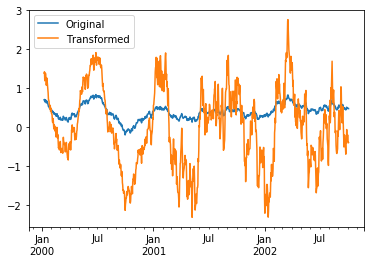

In [8]:
compare.plot()

In [287]:
x =[1]*5

In [288]:
x

[1, 1, 1, 1, 1]

In [289]:
y=[2]*6
y

[2, 2, 2, 2, 2, 2]

In [290]:
x+y

[1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2]

In [291]:
df_re = pd.DataFrame({'A': [1] * 10 + [5] * 10,'B': np.arange(20)})
df_re

,A,B
0,1,0
1,1,1
2,1,2
3,1,3
4,1,4
5,1,5
6,1,6
7,1,7
8,1,8
9,1,9


In [308]:
df_re.groupby('A').rolling(4,min_periods=2).B.mean()

A    
1  0      NaN
   1      0.5
   2      1.0
   3      1.5
   4      2.5
   5      3.5
   6      4.5
   7      5.5
   8      6.5
   9      7.5
5  10     NaN
   11    10.5
   12    11.0
   13    11.5
   14    12.5
   15    13.5
   16    14.5
   17    15.5
   18    16.5
   19    17.5
Name: B, dtype: float64

In [318]:
df_re.groupby('A').expanding().sum()

A      B
A                
1 0    1.0    0.0
  1    2.0    1.0
  2    3.0    3.0
  3    4.0    6.0
  4    5.0   10.0
  5    6.0   15.0
  6    7.0   21.0
  7    8.0   28.0
  8    9.0   36.0
  9   10.0   45.0
5 10   5.0   10.0
  11  10.0   21.0
  12  15.0   33.0
  13  20.0   46.0
  14  25.0   60.0
  15  30.0   75.0
  16  35.0   91.0
  17  40.0  108.0
  18  45.0  126.0
  19  50.0  145.0

In [9]:
df_re = pd.DataFrame({'date': pd.date_range(start='2016-01-01',periods=4,freq='W'),'group': [1, 1, 2, 2],'val': [5, 6, 7, 8]}).set_index('date')

In [10]:
df_re

,group,val
date,,
2016-01-03,1,5
2016-01-10,1,6
2016-01-17,2,7
2016-01-24,2,8


In [22]:
df_re.groupby('group').resample('1D').ffill()

group  val
group date                  
1     2016-01-03      1    5
      2016-01-04      1    5
      2016-01-05      1    5
      2016-01-06      1    5
      2016-01-07      1    5
      2016-01-08      1    5
      2016-01-09      1    5
      2016-01-10      1    6
2     2016-01-17      2    7
      2016-01-18      2    7
      2016-01-19      2    7
      2016-01-20      2    7
      2016-01-21      2    7
      2016-01-22      2    7
      2016-01-23      2    7
      2016-01-24      2    8

In [23]:
sf = pd.Series([1, 1, 2, 3, 3, 3])

In [24]:
sf

0    1
1    1
2    2
3    3
4    3
5    3
dtype: int64

In [25]:
sf.groupby(sf).filter(lambda x: x.sum() > 2)

3    3
4    3
5    3
dtype: int64

In [31]:
dff = pd.DataFrame({'A': np.arange(8), 'B': list('aabbbbcc'),'C':np.arange(8)})
dff

,A,B,C
0,0,a,0
1,1,a,1
2,2,b,2
3,3,b,3
4,4,b,4
5,5,b,5
6,6,c,6
7,7,c,7


In [32]:
dff.groupby('B').filter(lambda x: len(x) > 2)


,A,B,C
2,2,b,2
3,3,b,3
4,4,b,4
5,5,b,5
